DATASET 1 - Atp_data

Objetivo:

Analizar datos de los jugadores de tenis en el período comprendido entre los años 2000 al 2018.

Líneas de estudios posibles:
     * Explorar los datos a fin de determinar los mejores jugadores del período
     * Desarrollar un criterio para establecer a los mejores jugadores según cada superficie
     * Determinar el íncide de victorias por partido jugado, a fin de concluir al mejor jugador en el período trabajado

In [30]:
# Importamos el archivo atp_data, así mismo importamos pandas y vemos algunos datos del dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('C:/Users/jvaldez/Desktop/CODER_Science/CoderHouse/Entrega1/atp_data.csv')
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [31]:
# Convertir la columna de fechas al formato datetime
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
# Extraer el año de la fecha y asignarlo a una nueva columna
df['Date_Year'] = df['Date'].dt.year
print(df.columns)
print(df.index)

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'Wsets',
       'Lsets', 'Comment', 'PSW', 'PSL', 'B365W', 'B365L', 'elo_winner',
       'elo_loser', 'proba_elo', 'Date_Year'],
      dtype='object')
RangeIndex(start=0, stop=44708, step=1)


In [33]:
# Eliminamos la columna Date que reemplazamos y ya no nos será útil
df = df.drop('Date', axis=1)
print(df.columns)

Index(['ATP', 'Location', 'Tournament', 'Series', 'Court', 'Surface', 'Round',
       'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'Wsets', 'Lsets',
       'Comment', 'PSW', 'PSL', 'B365W', 'B365L', 'elo_winner', 'elo_loser',
       'proba_elo', 'Date_Year'],
      dtype='object')


In [34]:
# Reorganizamos las columnas
column_order = ['ATP', 'Location', 'Tournament', 'Date_Year', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'Wsets', 'Lsets', 'Comment', 'PSW', 'PSL', 'B365W', 'B365L', 'elo_winner', 'elo_loser', 'proba_elo']
df = df[column_order]
print(df.columns)

Index(['ATP', 'Location', 'Tournament', 'Date_Year', 'Series', 'Court',
       'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank',
       'Wsets', 'Lsets', 'Comment', 'PSW', 'PSL', 'B365W', 'B365L',
       'elo_winner', 'elo_loser', 'proba_elo'],
      dtype='object')


In [35]:
# Imprimimos el DF actual para controlar que los cambios hayan sido los que buscamos
print(df)

       ATP   Location                          Tournament  Date_Year  \
0        1   Adelaide  Australian Hardcourt Championships       2000   
1        3       Doha                          Qatar Open       2000   
2        3       Doha                          Qatar Open       2000   
3        3       Doha                          Qatar Open       2000   
4        3       Doha                          Qatar Open       2000   
...    ...        ...                                 ...        ...   
44703   17     Dubai           Dubai Tennis Championships       2018   
44704   16   Acapulco                    Abierto Mexicano       2018   
44705   18  Sao Paulo                         Brasil Open       2018   
44706   16   Acapulco                    Abierto Mexicano       2018   
44707   18  Sao Paulo                         Brasil Open       2018   

              Series    Court Surface       Round  Best of            Winner  \
0      International  Outdoor    Hard   1st Round      

In [36]:
# Imprimimos el DF.describe para ver más datos del DF
print(df.describe)

<bound method NDFrame.describe of        ATP   Location                          Tournament  Date_Year  \
0        1   Adelaide  Australian Hardcourt Championships       2000   
1        3       Doha                          Qatar Open       2000   
2        3       Doha                          Qatar Open       2000   
3        3       Doha                          Qatar Open       2000   
4        3       Doha                          Qatar Open       2000   
...    ...        ...                                 ...        ...   
44703   17     Dubai           Dubai Tennis Championships       2018   
44704   16   Acapulco                    Abierto Mexicano       2018   
44705   18  Sao Paulo                         Brasil Open       2018   
44706   16   Acapulco                    Abierto Mexicano       2018   
44707   18  Sao Paulo                         Brasil Open       2018   

              Series    Court Surface       Round  Best of            Winner  \
0      International 

In [37]:
# Ahora, nos proponemos a trabajar un poco sobre los datos del Dataset

# Obtener el top 10 de los jugadores más ganadores
top_10_winners = df['Winner'].value_counts().head(10)

# Imprimir el resultado
print("Top 10 de los jugadores más ganadores:")
print(top_10_winners)

Top 10 de los jugadores más ganadores:
Winner
Federer R.      970
Nadal R.        803
Djokovic N.     687
Ferrer D.       632
Murray A.       560
Roddick A.      538
Berdych T.      524
Verdasco F.     454
Davydenko N.    453
Gasquet R.      450
Name: count, dtype: int64


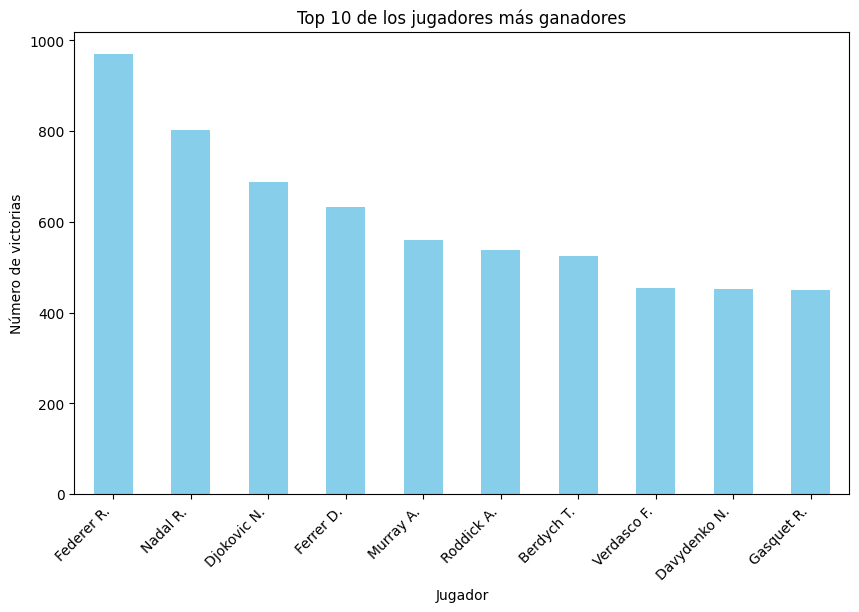

In [38]:
# Ahora lo llevamos a un gráfico

plt.figure(figsize=(10, 6))
top_10_winners.plot(kind='bar', color='skyblue')
plt.title('Top 10 de los jugadores más ganadores')
plt.xlabel('Jugador')
plt.ylabel('Número de victorias')
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
# Convertir los índices a cadenas
top_10_winners.index = top_10_winners.index.astype(str)  

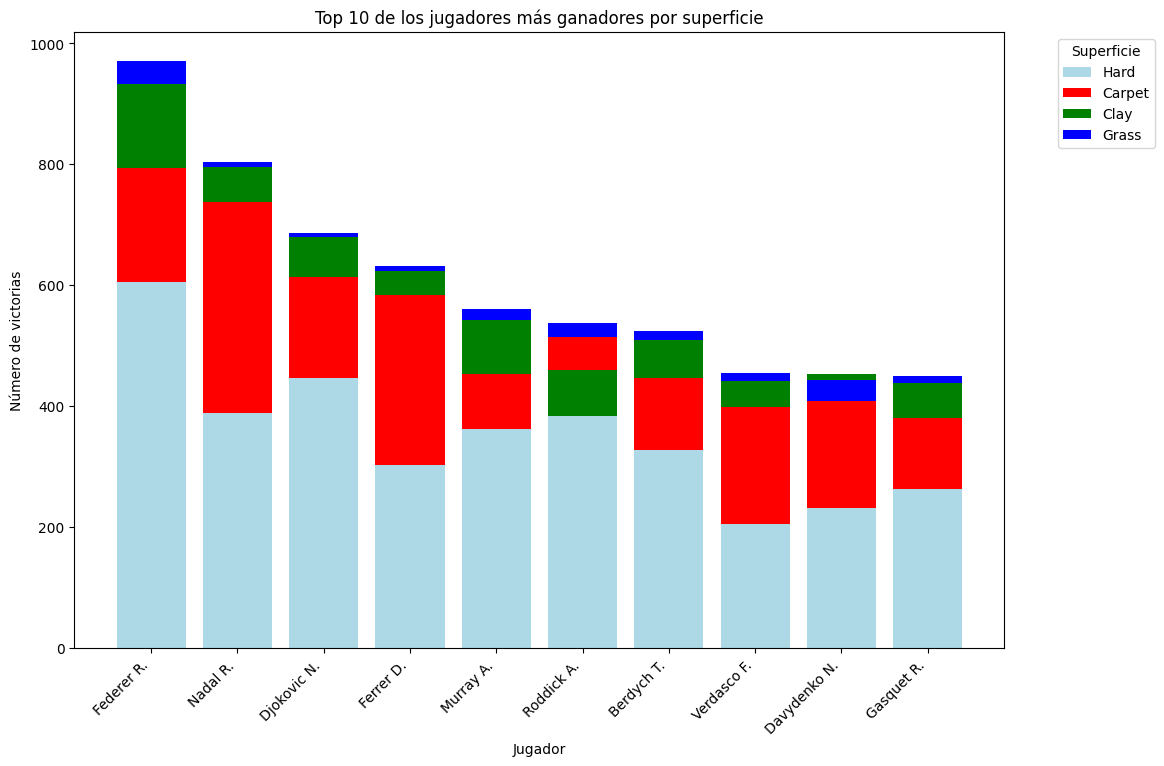

In [40]:
# Obtener el top 10 de los jugadores más ganadores
top_10_winners = df['Winner'].value_counts().head(10)
top_10_winners.index = top_10_winners.index.astype(str)  # Convertir los índices a cadenas

# Definir una paleta de colores para cada tipo de superficie
surface_colors = {'Hard': 'lightblue', 'Carpet': 'blue', 'Clay': 'red', 'Grass': 'green'}

# Crear un gráfico de barras apiladas con colores según la superficie
plt.figure(figsize=(12, 8))

# Iterar sobre los jugadores en el top 10
for winner in top_10_winners.index:
    surface_counts = df.loc[df['Winner'] == winner, 'Surface'].value_counts()
    surfaces = surface_counts.index
    counts = surface_counts.values
    bottom = 0

    # Iterar sobre las superficies y agregar barras apiladas
    for surface, count in zip(surfaces, counts):
        plt.bar(winner, count, bottom=bottom, color=surface_colors.get(surface, 'gray'))
        bottom += count

plt.title('Top 10 de los jugadores más ganadores por superficie')
plt.xlabel('Jugador')
plt.ylabel('Número de victorias')
plt.xticks(rotation=45, ha='right')
plt.legend(surface_colors, title='Superficie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

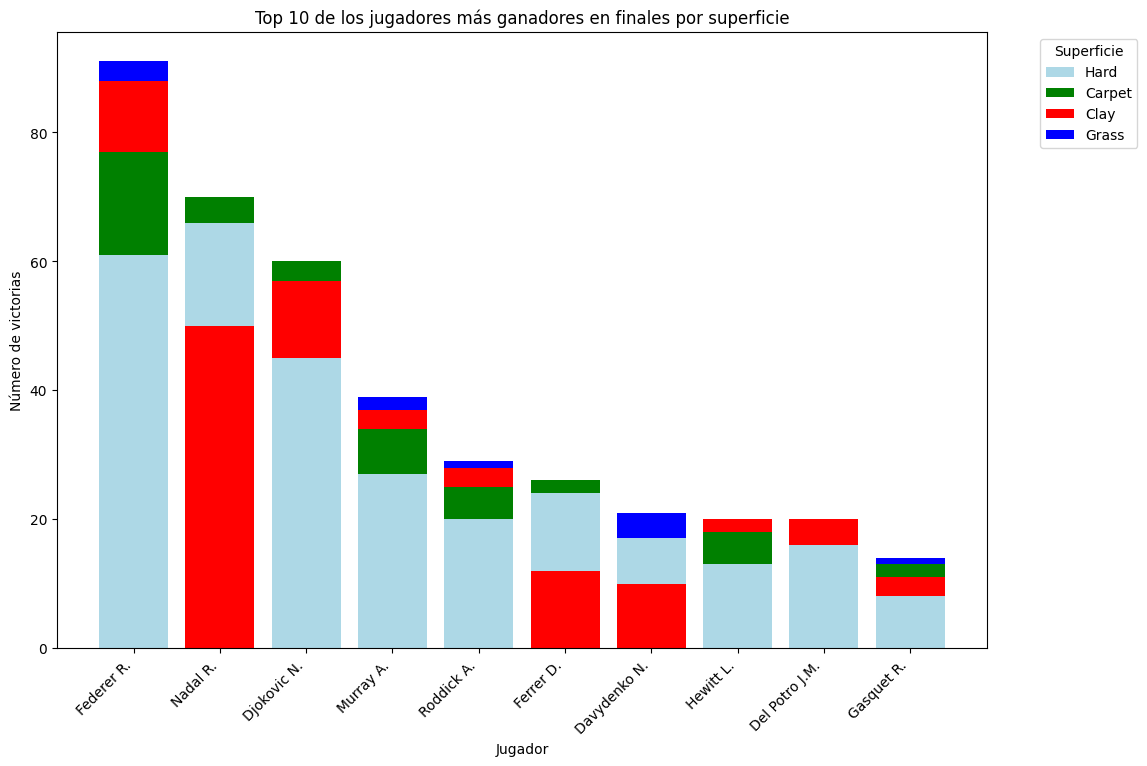

In [41]:
# Filtrar para incluir solo partidos de finales (Round = 'The Final')
df_finals = df[df['Round'] == 'The Final']

# Obtener el top 10 de los jugadores más ganadores en finales
top_10_winners_finals = df_finals['Winner'].value_counts().head(10)
top_10_winners_finals.index = top_10_winners_finals.index.astype(str)

# Crear un gráfico de barras apiladas con colores según la superficie
plt.figure(figsize=(12, 8))

# Iterar sobre los jugadores en el top 10 de finales
for winner in top_10_winners_finals.index:
    surface_counts = df_finals.loc[df_finals['Winner'] == winner, 'Surface'].value_counts()
    surfaces = surface_counts.index
    counts = surface_counts.values
    bottom = 0

    # Iterar sobre las superficies y agregar barras apiladas
    for surface, count in zip(surfaces, counts):
        plt.bar(winner, count, bottom=bottom, color=surface_colors.get(surface, 'gray'))
        bottom += count

plt.title('Top 10 de los jugadores más ganadores en finales por superficie')
plt.xlabel('Jugador')
plt.ylabel('Número de victorias')
plt.xticks(rotation=45, ha='right')
plt.legend(surface_colors, title='Superficie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

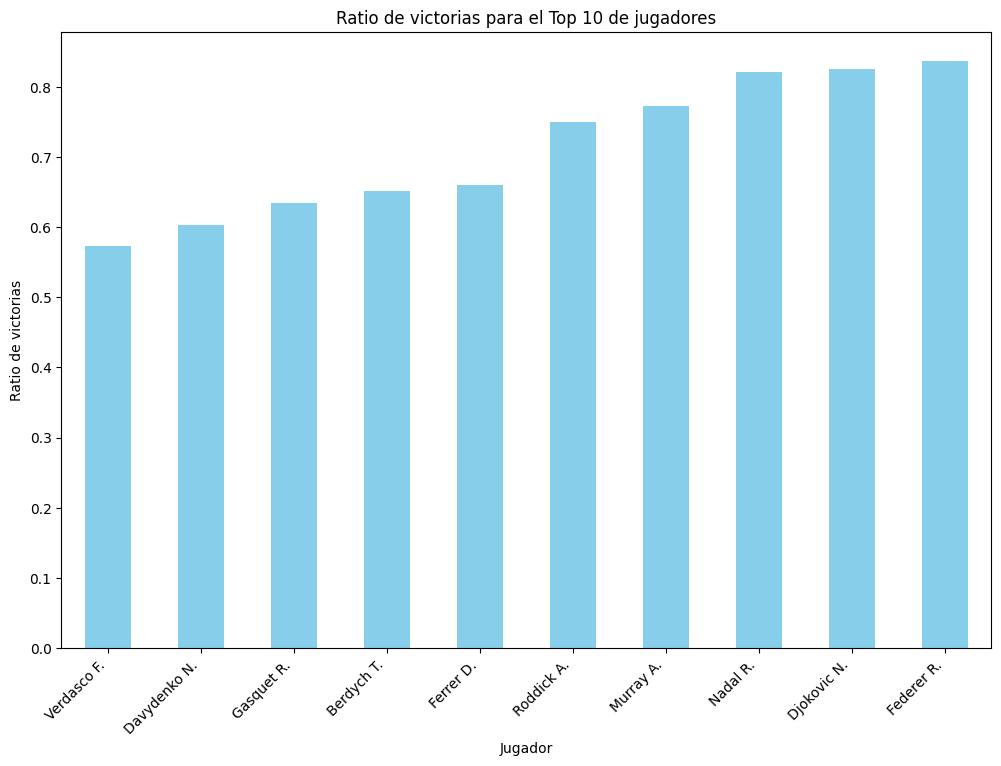

In [42]:
# Obtener el top 10 de los jugadores más ganadores
top_10_players = df['Winner'].value_counts().head(10)
top_10_players.index = top_10_players.index.astype(str)  # Convertir los índices a cadenas

# Calcular el número total de partidos ganados por cada jugador
total_wins = df['Winner'].value_counts()

# Concatenar las Series de ganadores y perdedores y luego calcular el número total de partidos jugados
total_matches = pd.concat([df['Winner'], df['Loser']]).value_counts()

# Calcular el ratio de victorias para cada jugador
win_ratio = total_wins / total_matches

# Crear un gráfico de barras para visualizar el ratio de victorias
plt.figure(figsize=(12, 8))
win_ratio[top_10_players.index].sort_values().plot(kind='bar', color='skyblue')
plt.title('Ratio de victorias para el Top 10 de jugadores')
plt.xlabel('Jugador')
plt.ylabel('Ratio de victorias')
plt.xticks(rotation=45, ha='right')
plt.show()

DATASET 2 - Life Expectancy Data

Objetivo:

Analizar datos de los diferentes países en los años 2000 a 2015

Líneas de estudios posibles:
     * Analizar diferentes aspectos de los datos con cortes por geográficos o análiticos en específico
     * Realizar un seguimiento de la evolución de los diferentes aspectos trabajados
     * Determinar rangos de crecimiento y decrecimiento de los diferentes países/regiones

In [43]:
# Cargamos el archivo CSV
df_life = pd.read_csv('C:/Users/jvaldez/Desktop/CODER_Science/CoderHouse/Entrega1/Life Expectancy Data.csv')
df_life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [44]:
# Exploramos algunos de los datos del Dataset
df_life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [45]:
# Filtrar los datos para obtener solo los registros del año 2000 y del año 2015
df_2000 = df_life[df_life['Year'] == 2000]
df_2015 = df_life[df_life['Year'] == 2015]

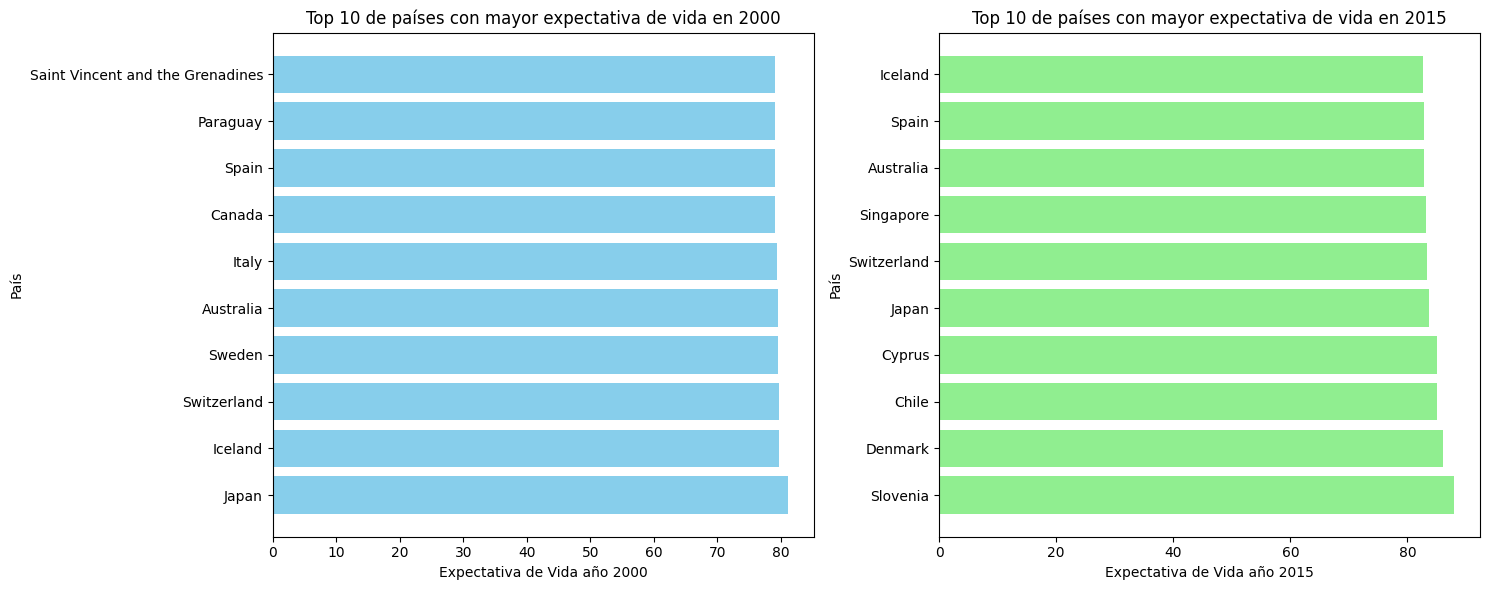

In [46]:
# Calcular el top 10 de países con mayor expectativa de vida para el año 2000
top_10_2000 = df_2000.nlargest(10, 'Life expectancy ')

# Calcular el top 10 de países con mayor expectativa de vida para el año 2015
top_10_2015 = df_2015.nlargest(10, 'Life expectancy ')

# Visualizar los top 10 de ambos años
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico para el top 10 de 2000
axes[0].barh(top_10_2000['Country'], top_10_2000['Life expectancy '], color='skyblue')
axes[0].set_title('Top 10 de países con mayor expectativa de vida en 2000')
axes[0].set_xlabel('Expectativa de Vida año 2000')
axes[0].set_ylabel('País')

# Gráfico para el top 10 de 2015
axes[1].barh(top_10_2015['Country'], top_10_2015['Life expectancy '], color='lightgreen')
axes[1].set_title('Top 10 de países con mayor expectativa de vida en 2015')
axes[1].set_xlabel('Expectativa de Vida año 2015')
axes[1].set_ylabel('País')

plt.tight_layout()
plt.show()

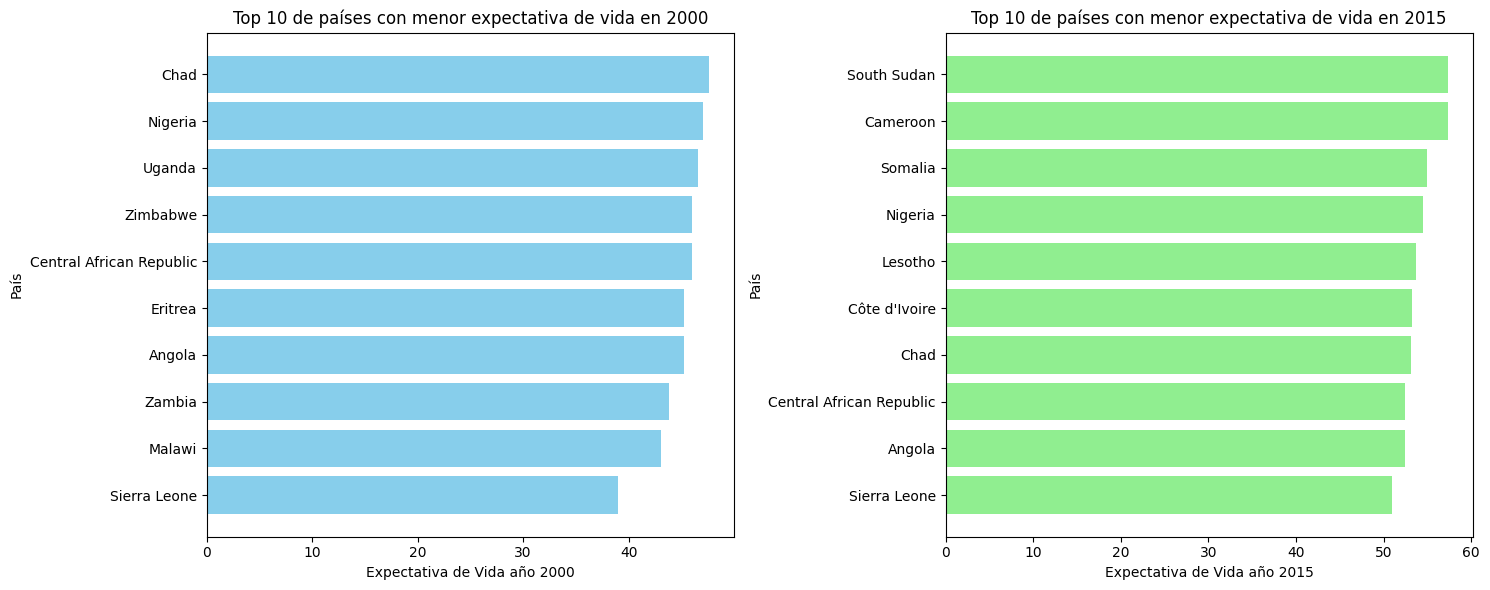

In [47]:
# Calcular el top 10 de países con mayor expectativa de vida para el año 2000
top_10_2000 = df_2000.nsmallest(10, 'Life expectancy ')

# Calcular el top 10 de países con mayor expectativa de vida para el año 2015
top_10_2015 = df_2015.nsmallest(10, 'Life expectancy ')

# Visualizar los top 10 de ambos años
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico para el top 10 de 2000
axes[0].barh(top_10_2000['Country'], top_10_2000['Life expectancy '], color='skyblue')
axes[0].set_title('Top 10 de países con menor expectativa de vida en 2000')
axes[0].set_xlabel('Expectativa de Vida año 2000')
axes[0].set_ylabel('País')

# Gráfico para el top 10 de 2015
axes[1].barh(top_10_2015['Country'], top_10_2015['Life expectancy '], color='lightgreen')
axes[1].set_title('Top 10 de países con menor expectativa de vida en 2015')
axes[1].set_xlabel('Expectativa de Vida año 2015')
axes[1].set_ylabel('País')

plt.tight_layout()
plt.show()

In [48]:
print(df_life.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [49]:
# Cargar el archivo excel con los continentes, a fin de enriquecer la información original
df_continentes = pd.read_excel('C:/Users/jvaldez/Desktop/CODER_Science/Datasets/paises_continentes.xlsx')
df_continentes.head()

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Angola,Africa
4,Antigua and Barbuda,North America


In [50]:
# Ajustar el nombre de la columna para la fusión
merged_df = pd.merge(df_life, df_continentes, on='Country')

# Filtrar por año 2000 y 2015 y calcular el top 10 de países con mayor expectativa de vida
df_2000 = merged_df[merged_df['Year'] == 2000]
top_10_2000 = df_2000.nlargest(10, 'Life expectancy ')

df_2015 = merged_df[merged_df['Year'] == 2015]
top_10_2015 = df_2015.nlargest(10, 'Life expectancy ')

# Imprimir los resultados
print("Top 10 de países con mayor expectativa de vida en 2000:")
print(top_10_2000[['Country', 'Life expectancy ', 'Continent']])
print("\nTop 10 de países con mayor expectativa de vida en 2015:")
print(top_10_2015[['Country', 'Life expectancy ', 'Continent']])

Top 10 de países con mayor expectativa de vida en 2000:
                               Country  Life expectancy       Continent
1313                             Japan              81.1           Asia
1169                           Iceland              79.7         Europe
2520                       Switzerland              79.7         Europe
2504                            Sweden              79.6         Europe
127                          Australia              79.5        Oceania
1281                             Italy              79.4         Europe
495                             Canada              79.1  North America
2424                             Spain              79.1         Europe
1990                          Paraguay              79.0  South America
2183  Saint Vincent and the Grenadines              79.0  North America

Top 10 de países con mayor expectativa de vida en 2015:
          Country  Life expectancy       Continent
2329     Slovenia              88.0         

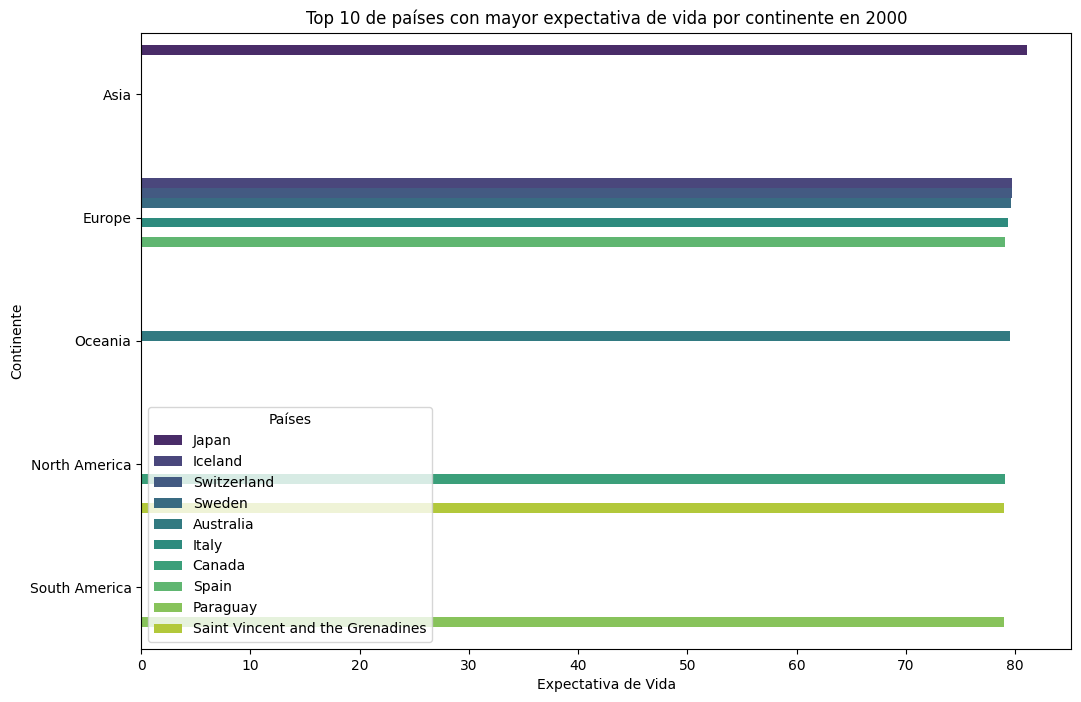

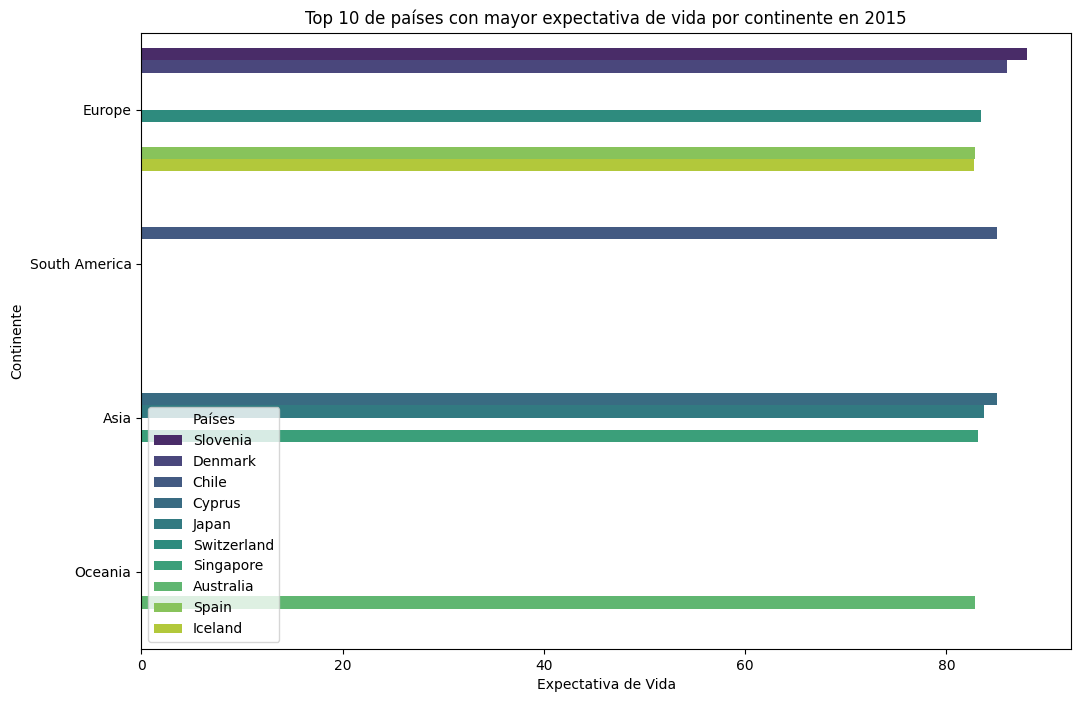

In [51]:
# Fusionar los datos con la información del continente
merged_df = pd.merge(df_life, df_continentes, on='Country')

# Filtrar por año 2000 y 2015 y calcular el top 10 de países con mayor expectativa de vida
df_2000 = merged_df[merged_df['Year'] == 2000]
df_2015 = merged_df[merged_df['Year'] == 2015]

top_10_2000 = df_2000.nlargest(10, 'Life expectancy ')
top_10_2015 = df_2015.nlargest(10, 'Life expectancy ')

# Crear un gráfico de barras para comparar los resultados de 2000 y 2015 por continente
plt.figure(figsize=(12, 8))
sns.barplot(x='Life expectancy ', y='Continent', data=top_10_2000, hue='Country', palette='viridis')
plt.title('Top 10 de países con mayor expectativa de vida por continente en 2000')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Continente')
plt.legend(title='Países')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Life expectancy ', y='Continent', data=top_10_2015, hue='Country', palette='viridis')
plt.title('Top 10 de países con mayor expectativa de vida por continente en 2015')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Continente')
plt.legend(title='Países')
plt.show()

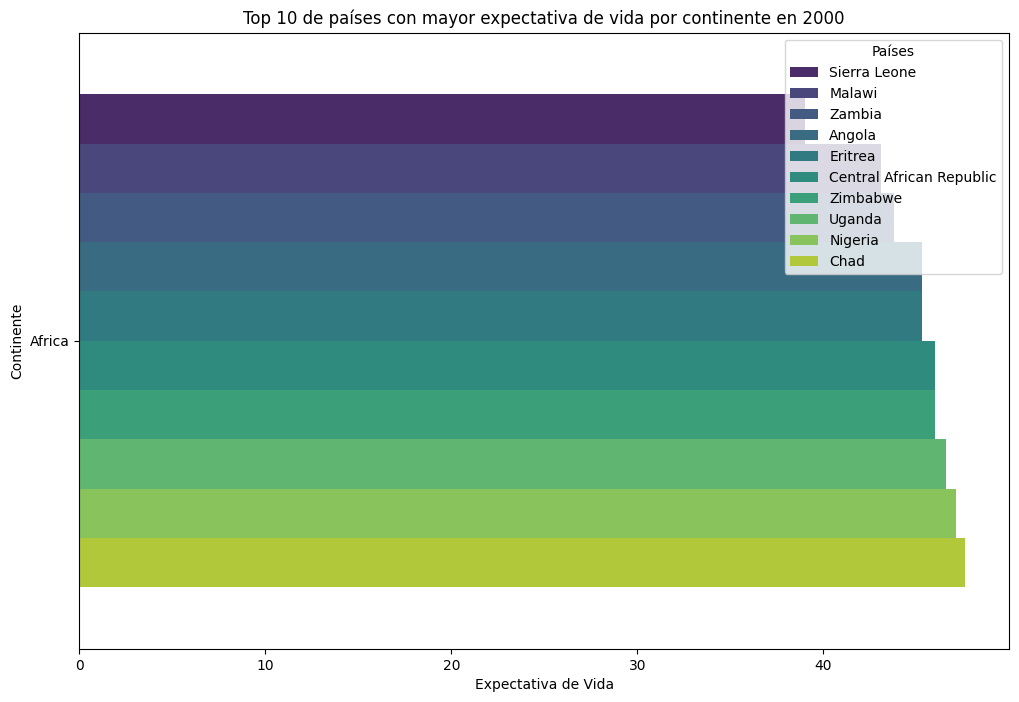

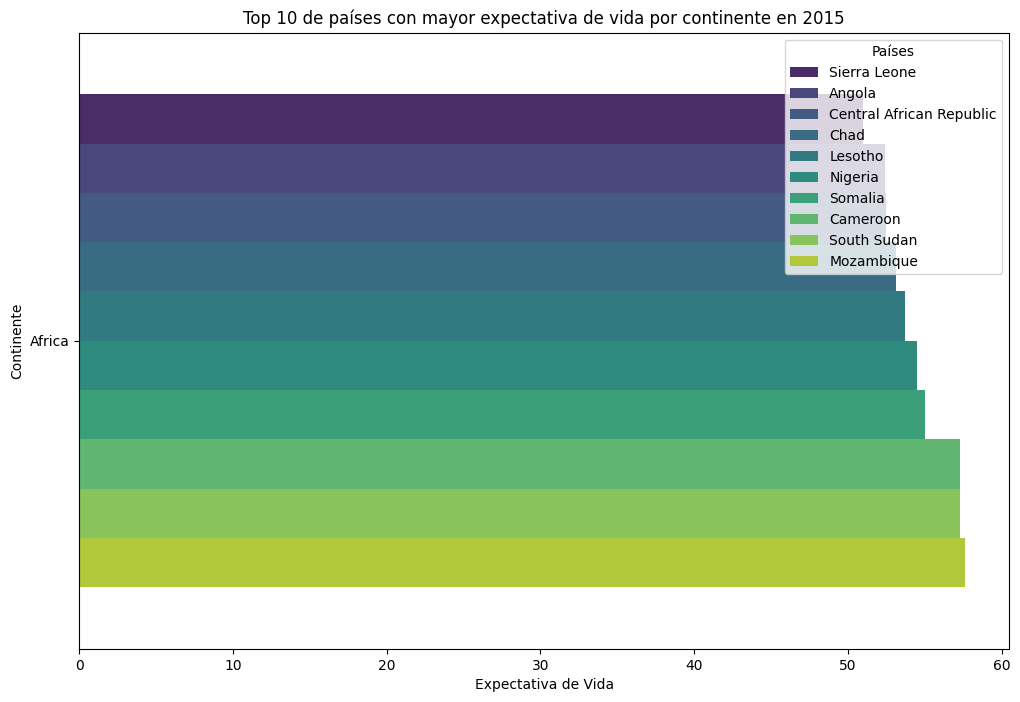

In [52]:
# Fusionar los datos con la información del continente
merged_df = pd.merge(df_life, df_continentes, on='Country')

# Filtrar por año 2000 y 2015 y calcular el top 10 de países con mayor expectativa de vida
df_2000 = merged_df[merged_df['Year'] == 2000]
df_2015 = merged_df[merged_df['Year'] == 2015]

top_10_2000 = df_2000.nsmallest(10, 'Life expectancy ')
top_10_2015 = df_2015.nsmallest(10, 'Life expectancy ')

# Crear un gráfico de barras para comparar los resultados de 2000 y 2015 por continente
plt.figure(figsize=(12, 8))
sns.barplot(x='Life expectancy ', y='Continent', data=top_10_2000, hue='Country', palette='viridis')
plt.title('Top 10 de países con mayor expectativa de vida por continente en 2000')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Continente')
plt.legend(title='Países')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Life expectancy ', y='Continent', data=top_10_2015, hue='Country', palette='viridis')
plt.title('Top 10 de países con mayor expectativa de vida por continente en 2015')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Continente')
plt.legend(title='Países')
plt.show()

DATASET 3 - Tornados

Objetivo:

Analizar datos de los incidentes de tornados ocurridos en la brecha de tiempo informada

Líneas de estudios posibles:
     * Analizar la ocurrencia para establecer incrementos/decrecimientos a lo largo de los años
     * Verificar las zonas más afectadas a lo largo del tiempo
     * Generar un modelo que permita anticipar los momentos en el año y lugar donde serán mayores las ocurrencias de estos fenómenos

In [53]:
# Cargar el archivo CSV
df_tornado = pd.read_excel('C:/Users/jvaldez/Desktop/CODER_Science/CoderHouse/Entrega1/historical-tornado-tracks.xlsx')
df_tornado.head()

,Geo Point,Geo Shape,OBJECTID,om,yr,mo,dy,date,time,tz,...,fc,pre_1996_Loss,GlobalID,CreationDate,Creator,EditDate,Editor,SHAPE_Length,dt,datetime
0,"29.47000514350003, -95.19000694399998","{""coordinates"": [[[-95.25000695699998, 29.4200...",8,8,1950,2,11,1950-02-11,13:10:00,3,...,0,4,{74992783-F93E-4BC0-85D4-E99066EFFE49},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.156205,1950-02-11T23:10:00+10:00,1950-02-11T23:10:00+10:00
1,"32.09000554150006, -98.34000787049999","{""coordinates"": [[[-98.350007872, 32.080005539...",13,13,1950,2,12,1950-02-12,01:15:00,3,...,0,4,{B3FA0D8F-C569-4999-AD57-9E0154FB788D},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.028284,1950-02-12T11:15:00+10:00,1950-02-12T11:15:00+10:00
2,"30.760005653000036, -88.15000512099996","{""coordinates"": [[[-88.20000513099995, 30.6700...",53,53,1950,4,18,1950-04-18,01:30:00,3,...,0,4,{DF1F82D3-1476-4B95-BBBF-0DB5604986D6},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.205913,1950-04-18T11:30:00+10:00,1950-04-18T11:30:00+10:00
3,"35.75004222300004, -77.41993663349996","{""coordinates"": [[[-77.42000223699995, 35.7500...",97,97,1950,5,12,1950-05-12,14:00:00,3,...,0,4,{16A54505-138D-41F7-B5FA-A1ED5FF56E04},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.000149,1950-05-13T00:00:00+10:00,1950-05-13T00:00:00+10:00
4,"37.17005424200005, -101.61995607599997","{""coordinates"": [[[-101.62000904699994, 37.170...",233,32,1951,4,26,1951-04-26,18:15:00,3,...,0,3,{D8A2482C-D931-4D45-9ECE-C7A6DE11B958},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.000143,1951-04-27T04:15:00+10:00,1951-04-27T04:15:00+10:00


In [54]:
# Cargar el archivo de estados
df_estados = pd.read_excel('C:/Users/jvaldez/Desktop/CODER_Science/CoderHouse/Entrega1/Estados_abreviatura.xlsx')
df_estados.head()

,Estado,Abreviatura
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [55]:
# Fusionar el DataFrame actual con el DataFrame de estados
df_tor_Est = pd.merge(df_tornado, df_estados, left_on='state', right_on='Abreviatura', how='left')

# Mostrar el DataFrame combinado
df_tor_Est.head()

,Geo Point,Geo Shape,OBJECTID,om,yr,mo,dy,date,time,tz,...,GlobalID,CreationDate,Creator,EditDate,Editor,SHAPE_Length,dt,datetime,Estado,Abreviatura
0,"29.47000514350003, -95.19000694399998","{""coordinates"": [[[-95.25000695699998, 29.4200...",8,8,1950,2,11,1950-02-11,13:10:00,3,...,{74992783-F93E-4BC0-85D4-E99066EFFE49},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.156205,1950-02-11T23:10:00+10:00,1950-02-11T23:10:00+10:00,Texas,TX
1,"32.09000554150006, -98.34000787049999","{""coordinates"": [[[-98.350007872, 32.080005539...",13,13,1950,2,12,1950-02-12,01:15:00,3,...,{B3FA0D8F-C569-4999-AD57-9E0154FB788D},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.028284,1950-02-12T11:15:00+10:00,1950-02-12T11:15:00+10:00,Texas,TX
2,"30.760005653000036, -88.15000512099996","{""coordinates"": [[[-88.20000513099995, 30.6700...",53,53,1950,4,18,1950-04-18,01:30:00,3,...,{DF1F82D3-1476-4B95-BBBF-0DB5604986D6},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.205913,1950-04-18T11:30:00+10:00,1950-04-18T11:30:00+10:00,Alabama,AL
3,"35.75004222300004, -77.41993663349996","{""coordinates"": [[[-77.42000223699995, 35.7500...",97,97,1950,5,12,1950-05-12,14:00:00,3,...,{16A54505-138D-41F7-B5FA-A1ED5FF56E04},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.000149,1950-05-13T00:00:00+10:00,1950-05-13T00:00:00+10:00,North Carolina,NC
4,"37.17005424200005, -101.61995607599997","{""coordinates"": [[[-101.62000904699994, 37.170...",233,32,1951,4,26,1951-04-26,18:15:00,3,...,{D8A2482C-D931-4D45-9ECE-C7A6DE11B958},2022-01-10T17:40:07Z,HostedByHIFLD,2022-01-10T17:40:07Z,HostedByHIFLD,0.000143,1951-04-27T04:15:00+10:00,1951-04-27T04:15:00+10:00,Kansas,KS


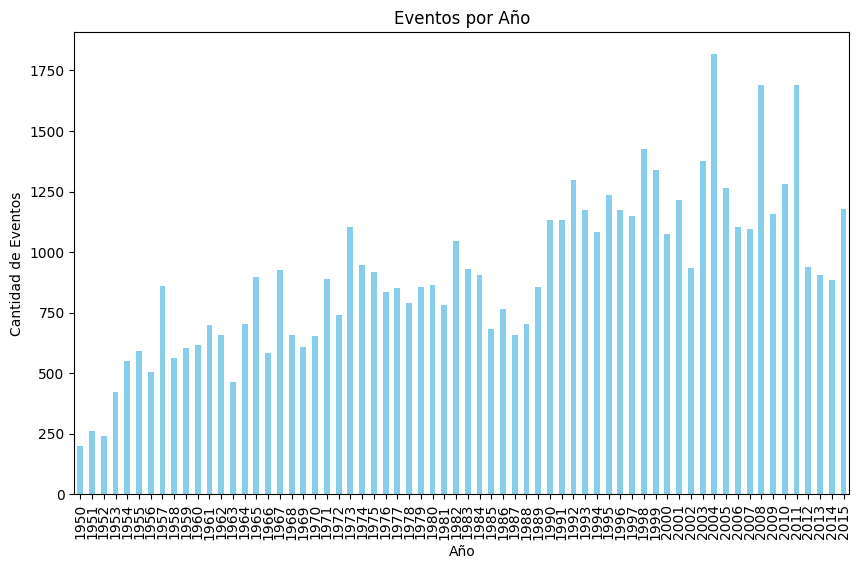

In [56]:
# Agrupar los eventos por año y contar la cantidad de eventos por año
eventos_por_anio = df_tor_Est.groupby('yr').size()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
eventos_por_anio.plot(kind='bar', color='skyblue')
plt.title('Eventos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Eventos')
plt.show()

In [61]:
# Guardar el nuevo DataFrame a un nuevo archivo CSV
df_tor_Est.to_csv('archivo_combinado.csv', index=False)


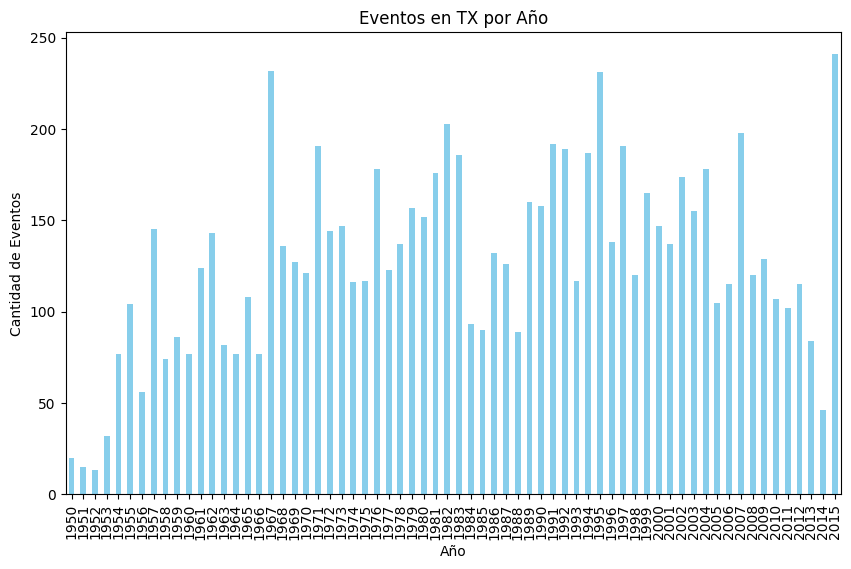

In [62]:
# Obtener el estado que tuvo más eventos
estado_mas_eventos = df_tor_Est['state'].value_counts().idxmax()

# Filtrar el DataFrame por el estado deseado
eventos_estado = df_tor_Est[df_tor_Est['state'] == estado_mas_eventos]

# Crear un gráfico de barras para mostrar los eventos por año
plt.figure(figsize=(10, 6))
eventos_estado['yr'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Eventos en {estado_mas_eventos} por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Eventos')
plt.show()

<Figure size 1200x800 with 0 Axes>

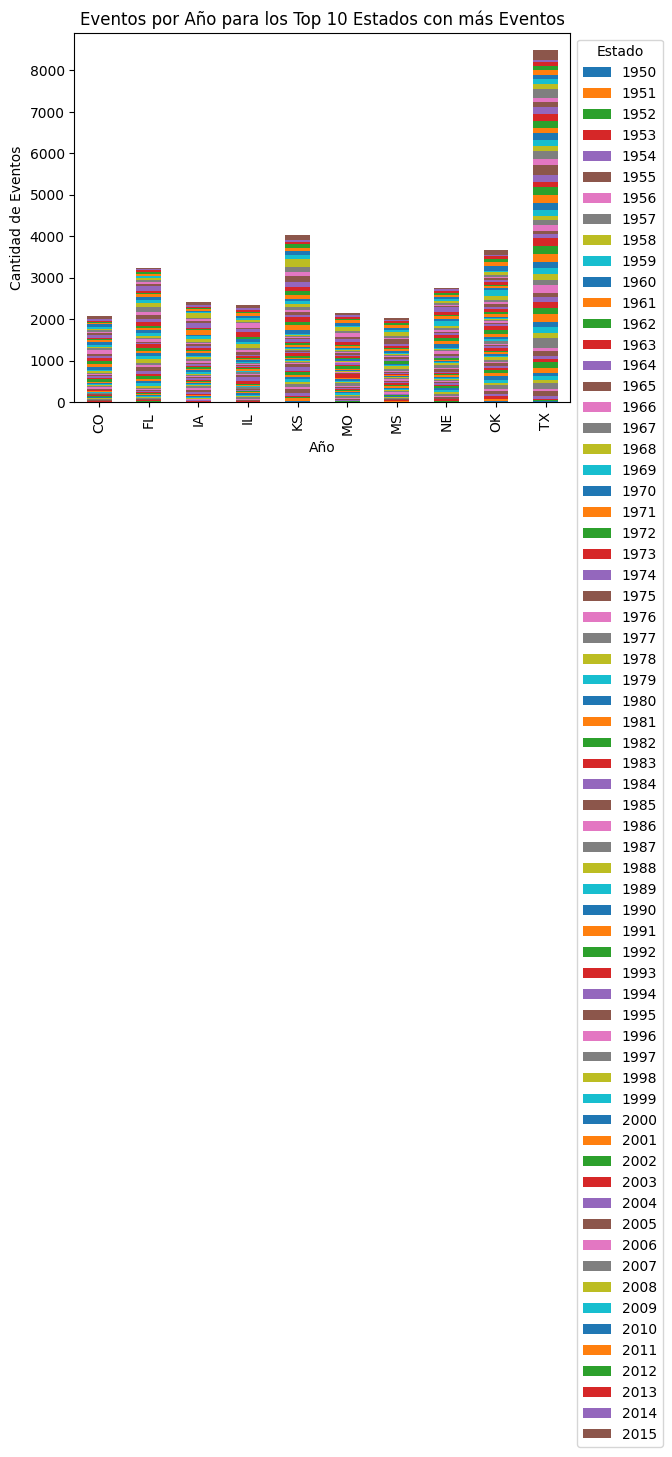

In [63]:
# Obtener los diez estados que tuvieron más eventos
top_10_estados = df_tor_Est['state'].value_counts().nlargest(10).index

# Filtrar el DataFrame por los diez estados más activos
eventos_top_10_estados = df_tor_Est[df_tor_Est['state'].isin(top_10_estados)]

# Crear un gráfico de barras para mostrar los eventos por año para los diez estados más activos
plt.figure(figsize=(12, 8))
eventos_top_10_estados.groupby(['state', 'yr']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Eventos por Año para los Top 10 Estados con más Eventos')
plt.xlabel('Año')
plt.ylabel('Cantidad de Eventos')
plt.legend(title='Estado', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1200x800 with 0 Axes>

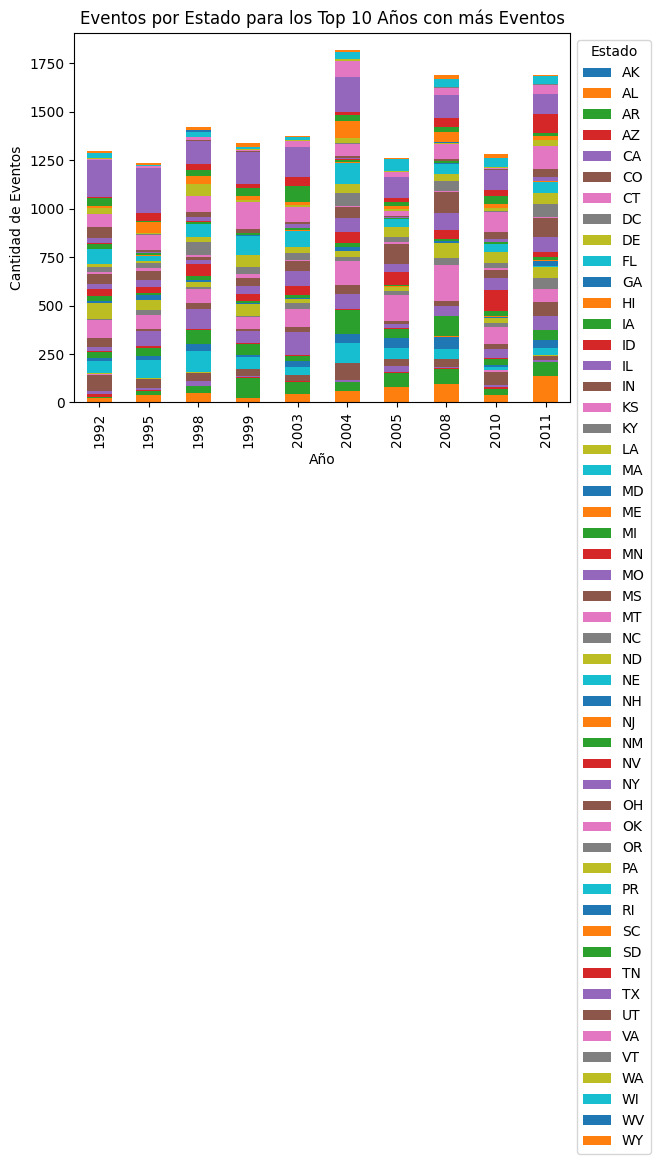

In [64]:
# Obtener los diez años con más eventos
top_10_anios = df_tor_Est['yr'].value_counts().nlargest(10).index

# Filtrar el DataFrame por los diez años con más eventos
eventos_top_10_anios = df_tor_Est[df_tor_Est['yr'].isin(top_10_anios)]

# Crear un gráfico de barras para mostrar los eventos por estado para los diez años con más eventos
plt.figure(figsize=(12, 8))
eventos_top_10_anios.groupby(['yr', 'state']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Eventos por Estado para los Top 10 Años con más Eventos')
plt.xlabel('Año')
plt.ylabel('Cantidad de Eventos')
plt.legend(title='Estado', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1400x800 with 0 Axes>

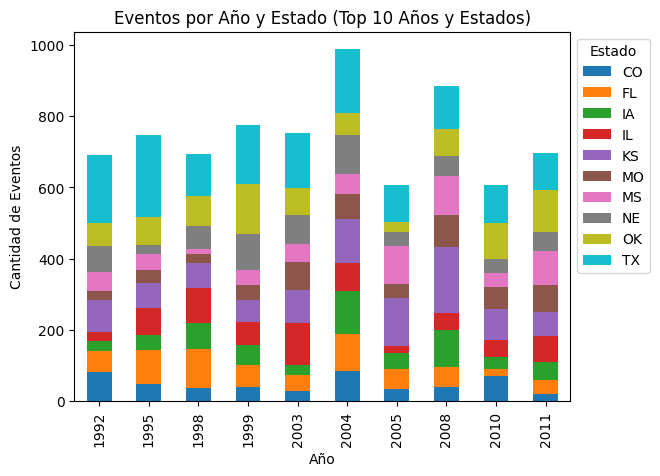

In [65]:
# Obtener los diez años con más eventos
top_10_anios = df_tor_Est['yr'].value_counts().nlargest(10).index

# Obtener los diez estados con más eventos
top_10_estados = df_tor_Est['state'].value_counts().nlargest(10).index

# Filtrar el DataFrame por los diez años y los diez estados con más eventos
eventos_top_10 = df_tor_Est[
    (df_tor_Est['yr'].isin(top_10_anios)) &
    (df_tor_Est['state'].isin(top_10_estados))
]

# Crear un gráfico de barras para mostrar los eventos por año y estado
plt.figure(figsize=(14, 8))
eventos_top_10.groupby(['yr', 'state']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Eventos por Año y Estado (Top 10 Años y Estados)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Eventos')
plt.legend(title='Estado', bbox_to_anchor=(1, 1))
plt.show()

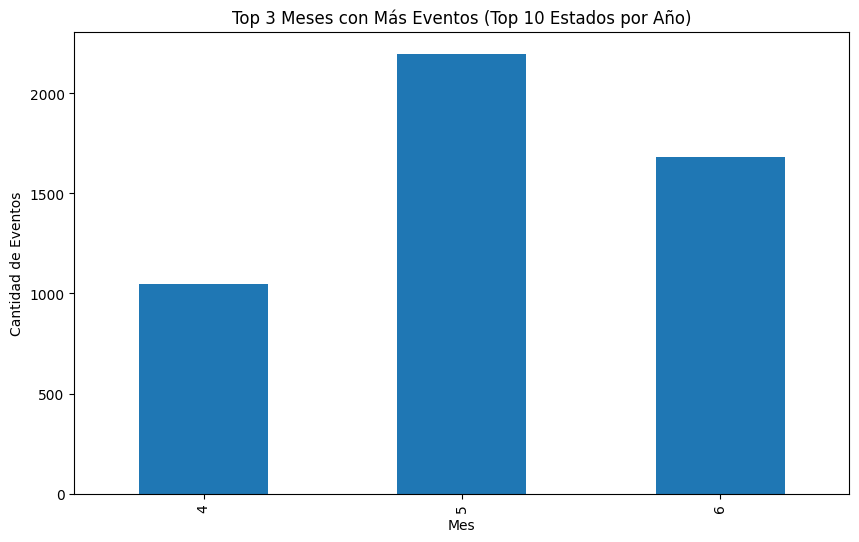

In [66]:
# Obtener los diez años con más eventos
top_10_anios = df_tor_Est['yr'].value_counts().nlargest(10).index

# Obtener los diez estados con más eventos
top_10_estados = df_tor_Est['state'].value_counts().nlargest(10).index

# Filtrar el DataFrame por los diez años y los diez estados con más eventos
eventos_top_10 = df_tor_Est[
    (df_tor_Est['yr'].isin(top_10_anios)) &
    (df_tor_Est['state'].isin(top_10_estados))
]

# Obtener el top 3 de los meses con más eventos
top_3_meses = eventos_top_10['mo'].value_counts().nlargest(3).index

# Filtrar el DataFrame por los top 3 meses
eventos_top_3_meses = eventos_top_10[eventos_top_10['mo'].isin(top_3_meses)]

# Crear un gráfico de barras para mostrar los eventos por mes
plt.figure(figsize=(10, 6))
eventos_top_3_meses['mo'].value_counts().sort_index().plot(kind='bar')
plt.title('Top 3 Meses con Más Eventos (Top 10 Estados por Año)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.show()